In [ ]:
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
articles = pd.read_csv('/content/drive/MyDrive/Postgrad/Skills/Assessment 2/Group 2/articles.B2M.csv') ###CHANGE BEFORE DOWNLOAD###
authors = pd.read_csv('/content/drive/MyDrive/Postgrad/Skills/Assessment 2/Group 2/authors.B2M.csv')###
paper_counts = pd.read_csv('/content/drive/MyDrive/Postgrad/Skills/Assessment 2/Group 2/paper_counts.csv')###

In [ ]:
summed_articles = articles.groupby('Year').count()

portion_articles = paper_counts.merge(summed_articles, on='Year')
portion_articles = portion_articles[['Year', 'Count', 'PMID']]
portion_articles = portion_articles.rename({'PMID':'Relevant'},axis=1)
portion_articles['Percentage (%)'] = ((portion_articles['Relevant']/portion_articles['Count'])*100)
portion_articles = portion_articles.set_index('Year')
ipd.display(articles)

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10575721,[Computer-assisted preoperative planning of kn...,The general configuration of replaced knee is ...,0035-1040,Revue de chirurgie orthopedique et reparatrice...,(85) 591-600,1999,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10617805,[Urogenital amyloidosis: clinico-pathological ...,Amyloidosis of the genito-urinary tract is unc...,0242-6498,Annales de pathologie,(19) 487-91,1999,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui d..."
2,10656443,Serum beta-2 microglobulin levels are a signif...,Our objective was to investigate the prognosti...,1078-0432,Clinical cancer research : an official journal...,(6) 147-52,2000,J,Rodriguez,J,"Department of Leukemia, University of Texas M...."
3,10790290,Exposure of Daudi cells to low-frequency magne...,The effect of extremely low-frequency electrom...,0033-7587,Radiation research,(153) 663-9,2000,C A,Morehouse,CA,FDA Center for Devices and Radiological Health...
4,10793017,Effects of dialyzer reuse on the permeability ...,Little attention has been given to the effects...,1523-6838,American journal of kidney diseases : the offi...,(35) 839-44,2000,J P,Matos,JP,"Department of Internal Medicine, Division of N..."
...,...,...,...,...,...,...,...,...,...,...,...
660,37889281,Artificial intelligence in early detection and...,Acute kidney injury (AKI) has a significant im...,1432-198X,"Pediatric nephrology (Berlin, Germany)",10.1007/s00467-023-06191-7,2023,Rupesh,Raina,R,Akron Nephrology Associates/Cleveland Clinic A...
661,37972698,Screening the optimal housekeeping genes (HKGs...,Selection of stable housekeeping genes (HKGs) ...,1879-0038,Gene,(895) 147966,2023,Nanjian,Luo,N,"School of Preclinical Medicine, Zunyi Medical ..."
662,38048169,Proteomics Analysis of Serum Reveals Potential...,"Heart failure (HF), a complex clinical syndrom...",1535-3907,Journal of proteome research,10.1021/acs.jproteome.3c00537,2023,Taohua,Lan,T,State Key Laboratory of Dampness Syndrome of C...
663,38053293,Highly efficient genome editing via CRISPR-Cas...,The CRISPR-Cas9 system has significantly advan...,1976-670X,BMB reports,5981,2023,A Reum,Han,AR,NaN


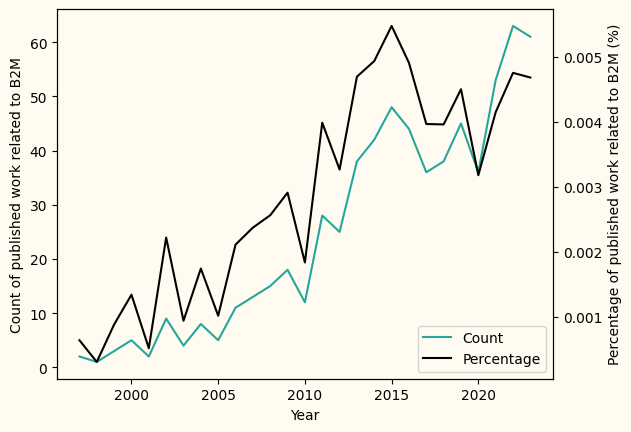

In [ ]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()

portion_articles.Relevant.plot(kind='line', color='#26a69a', ax=ax1, label='Count')
ax1.tick_params(axis='y', labelcolor='black')
portion_articles['Percentage (%)'].plot(kind='line', color='black', ax=ax2, label='Percentage')
ax2.tick_params(labelcolor='black')
plot_1 = ax1.set_ylabel('Count of published work related to B2M', color='black')
plot_2 = ax2.set_ylabel('Percentage of published work related to B2M (%)', color='black')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2, labels1+labels2, loc=4, facecolor='#fffbf0')
ax1.patch.set_facecolor('#fffbf0')
fig.patch.set_facecolor('#fffbf0')
plt.savefig('/content/drive/MyDrive/Postgrad/Skills/Assessment 2/Group 2/Last 5 years publications', bbox_inches='tight')

,Count,Relevant,Percentage (%),Cumulative,Rate,Year Count
Year,,,,,,
1997,313743,2,0.000637,2,2.000000,1
1998,329438,1,0.000304,3,1.500000,2
1999,340740,3,0.000880,6,2.000000,3
2000,373439,5,0.001339,11,2.750000,4
2001,388963,2,0.000514,13,2.600000,5
2002,405519,9,0.002219,22,3.666667,6
2003,426752,4,0.000937,26,3.714286,7
2004,459362,8,0.001742,34,4.250000,8
2005,492511,5,0.001015,39,4.333333,9


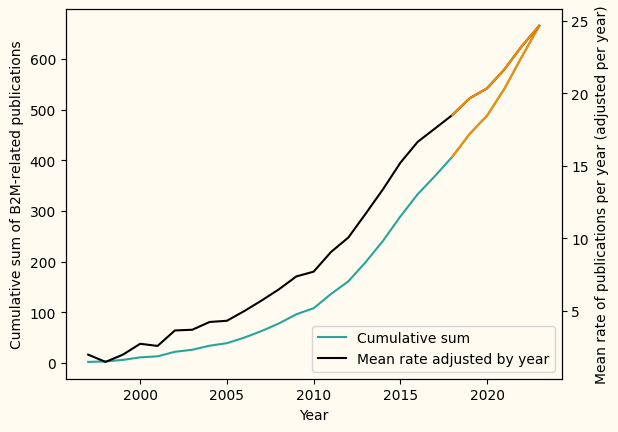

In [ ]:
portion_articles['Cumulative'] = portion_articles['Relevant'].cumsum()
portion_articles['Year Count'] = range(1,len(portion_articles)+1)
portion_articles['Rate'] = portion_articles['Cumulative']/portion_articles['Year Count']
ipd.display(portion_articles)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#fb8c00
portion_articles.Cumulative.plot(kind='line', color='#26a69a', label='Cumulative sum', ax=ax1)
portion_articles.loc[2018:].Cumulative.plot(kind='line', color='#fb8c00', label='_nolegend_', ax=ax1)
ax1.set_ylabel('Cumulative sum of B2M-related publications', color='black')
ax1.patch.set_facecolor('#fffbf0')
ax1
portion_articles['Rate'].plot(kind='line', color='black', label='Mean rate adjusted by year', ax=ax2)
portion_articles.loc[2018:].Rate.plot(kind='line', color='#fb8c00', label='_nolegend_', ax=ax2)
ax2.set_ylabel('Mean rate of publications per year (adjusted per year)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2, labels1+labels2, loc=4, facecolor='#fffbf0')
fig.patch.set_facecolor('#fffbf0')
plt.savefig('/content/drive/MyDrive/Postgrad/Skills/Assessment 2/Group 2/Last 5 years publications 2', bbox_inches='tight')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

keywords = nltk.tokenize.word_tokenize(articles.Abstract.str.lower().str.replace(',',' ').str.replace('.',' ').str.replace('(',' ').str.replace(')',' ').str.cat(sep=' '))
word_dist = nltk.FreqDist(keywords)
stopwords = nltk.corpus.stopwords.words('english')
non_stop_dist = nltk.FreqDist(i for i in keywords if i not in stopwords)

common_words = pd.DataFrame(non_stop_dist.most_common(20), columns=['Words', 'Frequency'])

ipd.display(common_words)

In [ ]:
stopwords_nltk = ' '.join(stopwords_nltk)
keywords = ' '.join(keywords)
cloud = WordCloud(stopwords=STOPWORDS, include_numbers=False, background_color='#fffbf0', max_words=50).generate(keywords)
fig = plt.figure()
ax=plt.axes()
plt.imshow(cloud)
ax.set_axis_off()
ax.patch.set_facecolor('#fffbf0')
fig.patch.set_facecolor('#fffbf0')
plt.tight_layout(pad=0)
plt.savefig('/content/drive/MyDrive/Postgrad/Skills/Assessment 2/Group 2/50 word cloud viridis', bbox_inches='tight')

In [ ]:
cloud = WordCloud(stopwords=STOPWORDS, include_numbers=False, background_color='#fffbf0', max_words=50, color_func=lambda *args, **kwargs: (38,166,154)).generate(keywords)
fig = plt.figure()
ax=plt.axes()
plt.imshow(cloud)
ax.set_axis_off()
ax.patch.set_facecolor('#fffbf0')
fig.patch.set_facecolor('#fffbf0')
plt.tight_layout(pad=0)
plt.savefig('/content/drive/MyDrive/Postgrad/Skills/Assessment 2/Group 2/50 word cloud one colour', bbox_inches='tight')